### 讀取原始資料

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/colabData/close.csv')
print(data.columns)
print(data.head(5))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['date', '0015', '0050', '0051', '0052', '0053', '0054', '0055', '0056',
       '0057',
       ...
       '9944', '9945', '9946', '9949', '9950', '9951', '9955', '9958', '9960',
       '9962'],
      dtype='object', length=2307)
         date  0015   0050   0051   0052  ...  9951  9955  9958  9960  9962
0  2007-04-23  9.54  57.85  32.83  38.40  ...  51.3  72.4   NaN  46.0  49.6
1  2007-04-24  9.54  58.10  32.99  38.65  ...  50.5  71.6   NaN  45.9  50.4
2  2007-04-25  9.52  57.60  32.80  38.59  ...  49.9  71.6   NaN  49.1  49.1
3  2007-04-26  9.59  57.70  32.80  38.60  ...  49.5  71.0   NaN  48.9  48.0
4  2007-04-27  9.55  57.50  32.72  38.40  ...  48.8  69.5   NaN  48.6  46.5

[5 rows x 2307 columns]


### 提取所需的股票資料

In [ ]:
data = data.set_index(data['date'])

In [ ]:
# 台灣50, MSCI, 高股息, 土銀富邦, 美元, 美債
#['0050', '0055', '0056', '01001T', '00682U', '00679B']

feature_keys = ['0050', '0055', '0056', '01001T', '00682U', '00679B']

features = data[feature_keys]
features = features['2018-01-03':'2021-12-30']

features.head(10)

,0050,0055,0056,01001T,00682U,00679B
date,,,,,,
2018-01-03,83.35,16.49,25.31,12.90,18.07,38.37
2018-01-04,83.50,16.52,25.41,12.85,18.12,38.50
2018-01-05,83.75,16.67,25.44,12.91,18.08,38.45
2018-01-08,84.10,16.85,25.57,12.86,18.15,38.31
2018-01-09,84.15,16.85,25.50,12.88,18.20,38.31
2018-01-10,83.75,16.97,25.37,12.90,18.20,37.90
2018-01-11,83.40,16.88,25.41,12.92,18.13,37.98
2018-01-12,84.10,16.98,25.54,12.90,18.03,38.01
2018-01-15,84.65,17.15,25.65,12.90,17.89,38.16


### Data Clean

In [ ]:
features = features.interpolate(method='linear', limit_direction='forward', axis=0)

### 計算加權資產

In [ ]:
# 65% 0056; 10% 01001T; 20% 00679B; 5% 00682U
weightIndex = 0.65*features['0056'].values + 0.1*features['01001T'].values + 0.2*features['00679B'].values + 0.05*features['00682U'].values
weightIndex

### 標準化數據

In [ ]:
weightIndex = weightIndex / weightIndex[0]

ctlIndex = features['0050'].values
ctlIndex = ctlIndex / ctlIndex[0]

### 繪圖

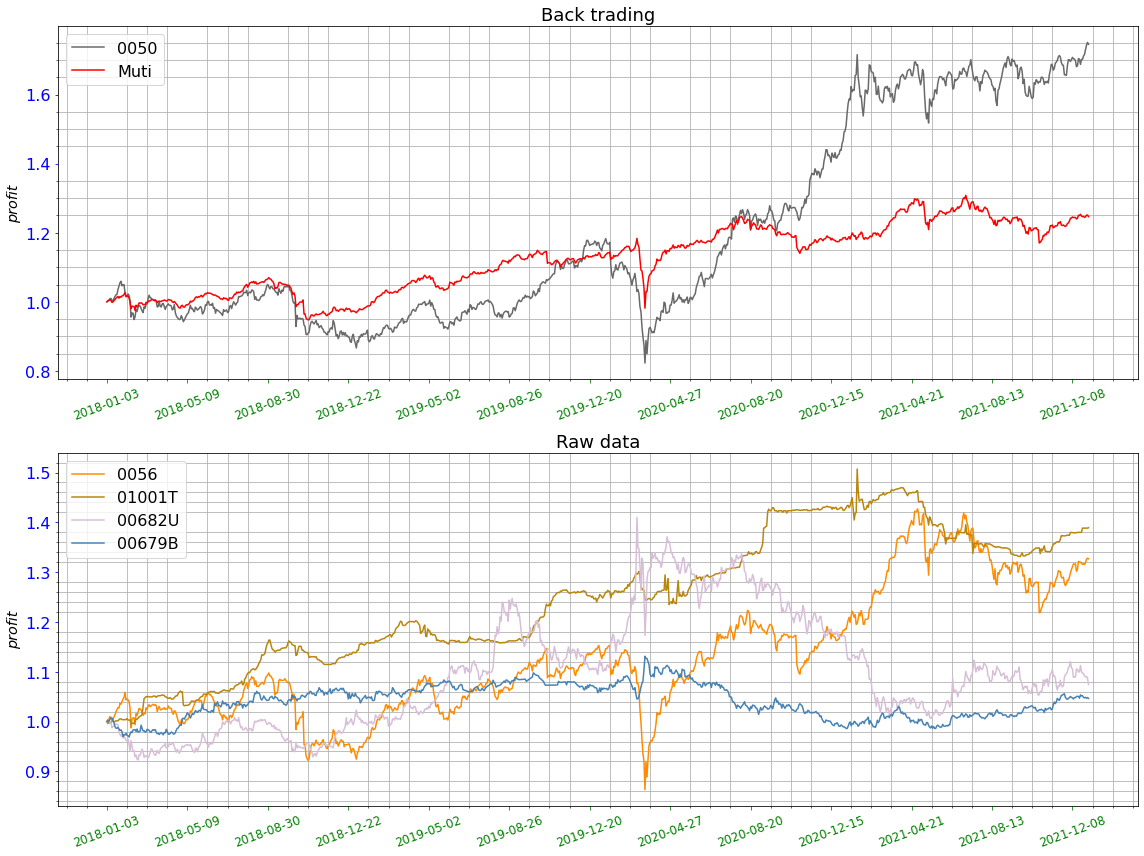

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(16,12)) #create figure
ax = fig.add_subplot(2, 1, 1) #create ax within figure

ax.plot(features.index, ctlIndex, color='dimgray', label='0050')
ax.plot(features.index, weightIndex, color='red', label='Muti')

ax.xaxis.set_major_locator(ticker.MultipleLocator(80)) #set xTicks interval
ax.xaxis.set_tick_params(rotation=20,labelsize=12,colors='g') #setting xticks
ax.yaxis.set_tick_params(labelsize=16,colors='b') #setting xticks
ax.minorticks_on()

ax.grid(which='minor', axis='both')
ax.set_title('Back trading',fontsize=18)
ax.set_ylabel('profit', fontsize='x-large',fontstyle='oblique')
ax.legend(fontsize=16)

#---------------------------------------------------------------------------

ax2 = fig.add_subplot(2, 1, 2) #create ax within figure

ax2.plot(features.index, features['0056'].values/features['0056'][0], color='darkorange', label='0056')
ax2.plot(features.index, features['01001T'].values/features['01001T'][0], color='darkgoldenrod', label='01001T')
ax2.plot(features.index, features['00679B'].values/features['00679B'][0], color='thistle', label='00682U')
ax2.plot(features.index, features['00682U'].values/features['00682U'][0], color='steelblue', label='00679B')

ax2.xaxis.set_major_locator(ticker.MultipleLocator(80)) #set xTicks interval 
ax2.xaxis.set_tick_params(rotation=20,labelsize=12,colors='g') #setting xticks
ax2.yaxis.set_tick_params(labelsize=16,colors='b') #setting xticks
ax2.minorticks_on()

ax2.grid(which='minor', axis='both')
ax2.set_title('Raw data',fontsize=18)
ax2.set_ylabel('profit', fontsize='x-large',fontstyle='oblique')
ax2.legend(fontsize=16)

plt.tight_layout()
plt.show()